# Import Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

# Load DataSet

In [71]:
df = pd.read_csv("Salary_Data.csv")

# take a look at the dataset
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [72]:
# Display initial data information
print("Initial Data Info:")
print(df.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


# Data Visualization

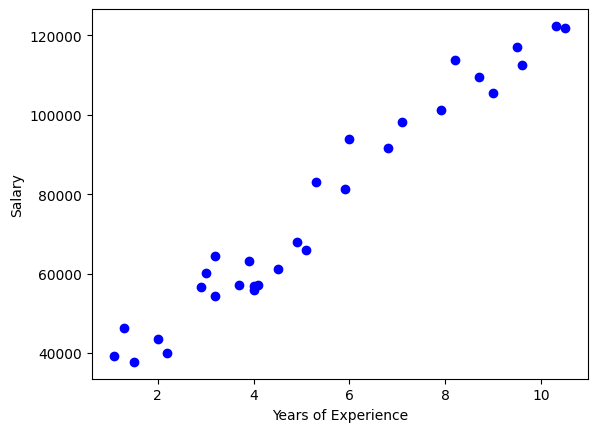

In [73]:
plt.scatter(df['YearsExperience'], df['Salary'],  color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Density'>

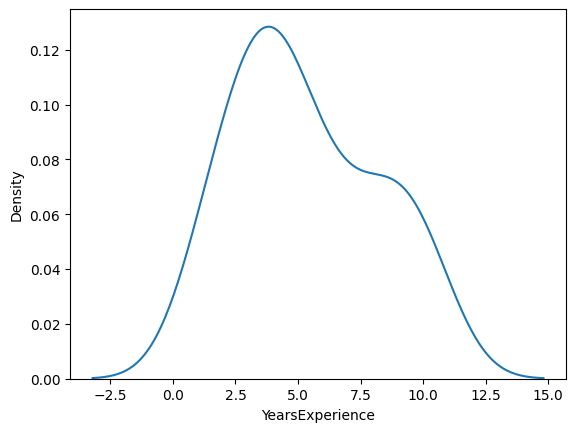

In [74]:
# Plot how the data is distributed in feature column
sns.kdeplot(df['YearsExperience'])

<Axes: ylabel='YearsExperience'>

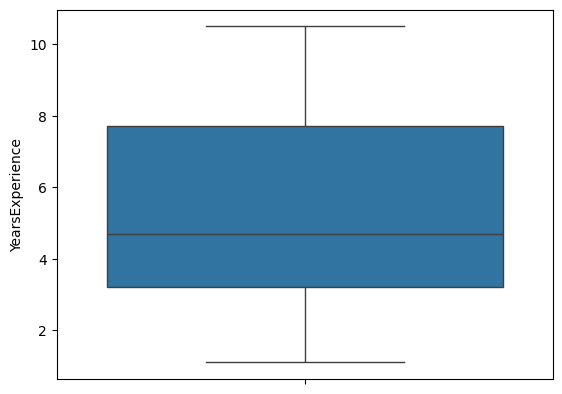

In [113]:
sns.boxplot(df['YearsExperience'])

# box plot shows we have no outliers

# Data Split

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['YearsExperience'], df['Salary'], test_size=0.25, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (22,) (22,)
Test set: (8,) (8,)


In [76]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [77]:
X_train.head()

,YearsExperience
12,4.0
0,1.1
4,2.2
16,5.1
5,2.9


# Fit Model on data before standardization

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)

In [110]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
Name: Salary, dtype: float64

In [83]:
y_pred

array([115439.88180109,  71396.10622651, 102320.45928951,  75144.51265839,
        55465.37889103,  60150.88693088, 121999.59305688, 107005.96732936])

# Find Error Metrics

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Absolute Error 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 38802588.99247065
Root Mean Squared Error: 6229.172416338358
R-squared: 0.9347210011126782


# Visualize the Regression Line

Text(0, 0.5, 'Salary')

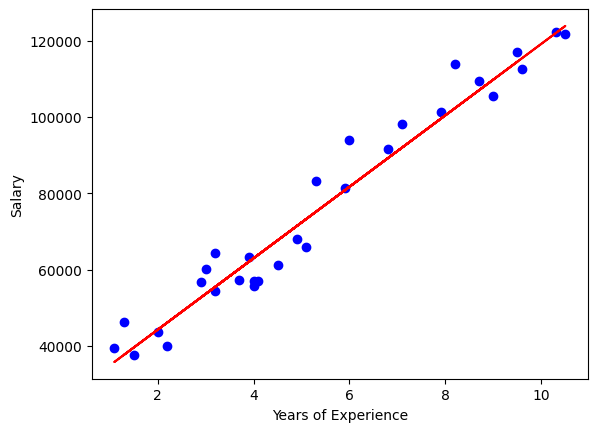

In [85]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.plot(X_train, model.predict(X_train),color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [127]:
model.coef_

array([25063.1519945])

In [128]:
model.intercept_

70416.40909090909

# Fit Model on data after standardization

In [102]:
# make the values of feature column between 0 and 1 by standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_trsm = sc.fit_transform(X_train)
X_test_trsm = sc.transform(X_test)

<Axes: ylabel='Density'>

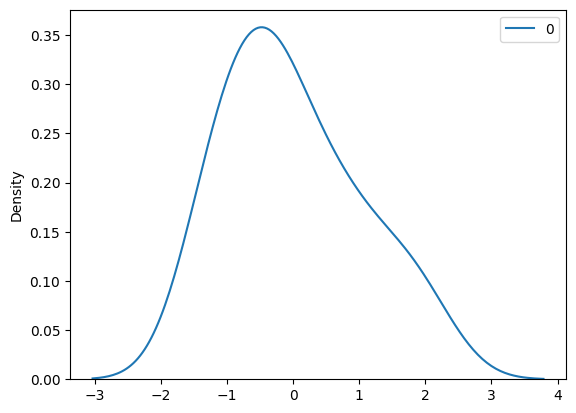

In [103]:
sns.kdeplot(X_train_trsm)

<Axes: >

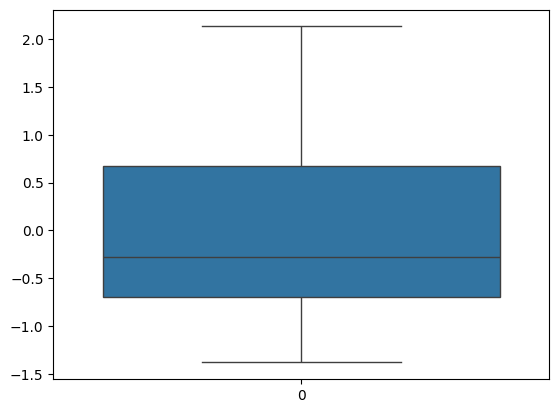

In [115]:
# boxplot after standardization

sns.boxplot(X_train_trsm)

In [104]:
model1 = LinearRegression()
model1.fit(X_train_trsm, y_train)

LinearRegression()

In [120]:
y_pred_trsm = model1.predict(X_test_trsm)

In [121]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
Name: Salary, dtype: float64

In [122]:
y_pred_trsm

array([115439.88180109,  71396.10622651, 102320.45928951,  75144.51265839,
        55465.37889103,  60150.88693088, 121999.59305688, 107005.96732936])

# Find New Error Metrics

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Absolute Error 
mse = mean_squared_error(y_test, y_pred_trsm)
print("Mean Squared Error:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_trsm))
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_trsm)
print("R-squared:", r2)

Mean Squared Error: 38802588.99247064
Root Mean Squared Error: 6229.172416338356
R-squared: 0.9347210011126782


# Visualize the Regression Line

Text(0, 0.5, 'Salary')

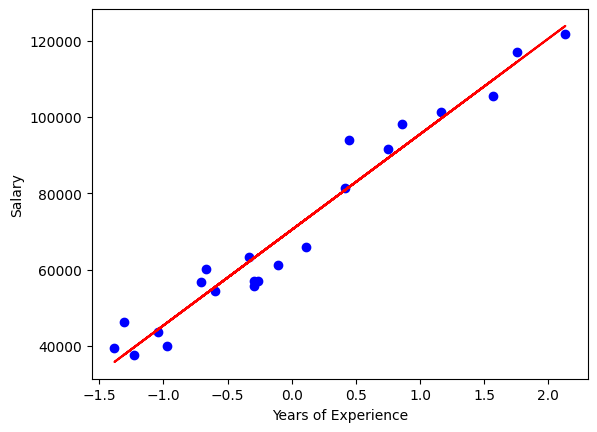

In [124]:
plt.scatter(X_train_trsm, y_train, color='blue')
plt.plot(X_train_trsm, model1.predict(X_train_trsm),color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [125]:
model1.coef_

array([25063.1519945])

In [126]:
model1.intercept_

70416.40909090909

# Conclusion
##### The model after standardization is same as the model before standardization. Linear regression is not affected by the scale of the features. The model will learn the same coefficients (except scaled appropriately) whether the features are standardized or not. The case would be different if I had applied Logistic Regression instead of Linear Regression. Because Logistic Regression is affected by the scale of the features.